# c05-plates

*Purpose*: 


## Informed Consent

As a reminder, this course is part of a study of engineers' behavior. While not all parts of the course include data collection, we will analyze your responses to this homework as part of the research.

We will analyze your answers to this homework, and may quote this work as part of published research.

You can ask to have your responses excluded from the study after the interview by sending us an email. Before starting this assignment, do you consent to sharing your work with the study?


I agree to share my responses with the study

- (Please type your name here)


In [1]:
import grama as gr
import pandas as pd
DF = gr.Intention()
%matplotlib inline

# For assertion
from pandas.api.types import is_numeric_dtype


## Background

(This continues the stang challenge.)


# Assess Statistical Control


In [2]:
from grama.data import df_stang


### __qX__ Assess statistical control across thicknesses


/Users/zach/Git/py_grama/grama/tran_pivot.py:471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and wi

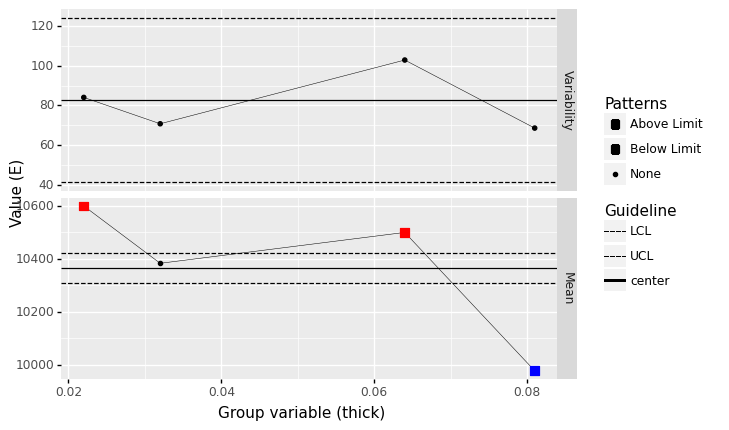

<ggplot: (8782861138375)>

In [3]:
(
    df_stang
    >> gr.pt_xbs(group="thick", var="E")
)

*Observations*

<!-- task-begin -->
- Is the variability of `E` under statistical control across plate thicknesses? How do you know?
  - (Your response here)
- Is the mean of `E` under statistical control across plate thicknesses? How do you know?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Is the variability of `E` under statistical control? How do you know?
  - Likely yes; the points are all within the control limits and there are no patterns in the data.
- Is the mean of `E` under statistical control? How do you know?
  - No; there are several violations of the control limits. In particular, the thickest plates have a much lower elasticity than the other specimens.
<!-- solution-end -->


## Follow-up experiment

*Note*: The following data were simulated; they do not correspond to physical experiments.


In [4]:
df_data = pd.read_csv("./data/c05-data.csv")
df_data

,E,mu,t,id_machine,id_specimen,id_measurement
0,10060.647234,0.320554,0.250,A,0,g
1,9436.456562,0.316964,0.250,A,1,g
2,10304.690739,0.323102,0.250,A,2,g
3,9660.050503,0.323996,0.250,A,3,g
4,10091.788906,0.317187,0.250,A,4,g
...,...,...,...,...,...,...
715,11905.097498,0.319136,0.125,F,115,l
716,11684.523643,0.320730,0.125,F,116,l
717,11830.849314,0.325941,0.125,F,117,l
718,12258.438424,0.316239,0.125,F,118,l


| Symbol | Variable | Meaning |
|---|---|---|
| `E` | Elasticity (ksi) | Mechanical property |
| `mu` | Poisson's ratio (-) | Mechanical property |
| `t` | Thickness (in) | Geometric property |
| `id_machine` | Unique machine identifier | Manufacturing variable |
| `id_specimen` | Unique specimen identifier | Manufacturing variable |
| `id_measurement` | Unique measurement (operator) identifier | Manufacturing variable |


### __qX__ Explore the experimental design

Answer the following questions to better understand the experimental design. Note that the same questions are posed within each cell and under *observations* below.

*Hint*: The verbs `tf_count()` and `tf_distinct()` will be very useful for answering some of these questions!


In [5]:
## Q: What thicknesses were tested?
# solution-begin
(
    df_data
    >> gr.tf_count(DF.t)
)
# solution-end

,t,n
0,0.125,360
1,0.250,360


In [6]:
## Q: How many unique specimens were manufactured?
# solution-begin
(
    df_data
    >> gr.tf_summarize(spec_max=gr.max(DF.id_specimen) + 1)
)
# solution-end

,spec_max
0,120


In [7]:
## Q: How many specimens were made on each machine?
# solution-begin
(
    df_data
    >> gr.tf_distinct(DF.id_specimen, DF.id_machine)
    >> gr.tf_count(DF.id_machine)
)
# solution-end

,id_machine,n
0,A,20
1,B,20
2,C,20
3,D,20
4,E,20
5,F,20


In [8]:
## Q: How many times did each operator measure each specimen?
# solution-begin
(
    df_data
    >> gr.tf_count(DF.id_specimen, DF.id_measurement)
    >> gr.tf_summarize(n_max=gr.max(DF.n))
)
# solution-end

,n_max
0,1


*Observations*

<!-- task-begin -->
- What thicknesses were tested?
  - (Your response here)
- How many unique specimens were manufactured?
  - (Your response here)
- How many specimens were made on each machine?
  - (Your response here)
- How many times did each operator measure each specimen?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- What thicknesses were tested?
  - 0.125 and 0.250 inches
- How many unique specimens were manufactured?
  - 120
- How many specimens were made on each machine?
  - 20 specimens each
- How many times did each operator measure each specimen?
  - Just once
<!-- solution-end -->


### __qX__ Compare across thicknesses

Compare the elasticity across plate thicknesses; does elasticity seem to be consistent across thickness?


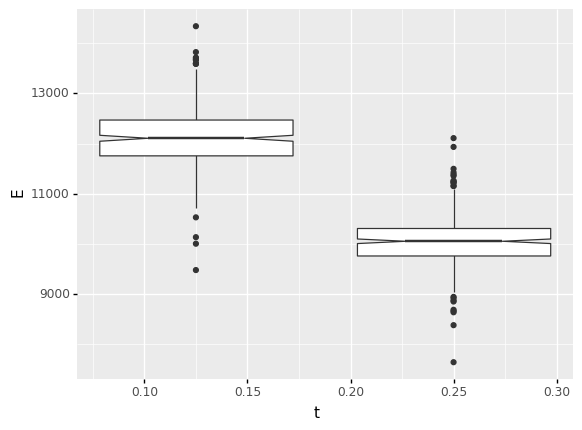

<ggplot: (8782805892256)>

In [16]:
(
    df_data
    >> gr.ggplot(gr.aes("t", "E"))
    + gr.geom_boxplot(gr.aes(group="t"), notch=True)
)

*Observations*

<!-- task-begin -->
- Is thickness consistent across plate thickness?
  - (Your response here)
- Will it be reasonable to group together plates of different thicknesses when assessing statistical control? Why or why not?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Is thickness consistent across plate thickness?
  - No; from the plot above, we can see a significant difference in median plate elasticity across thickness.
- Will it be reasonable to group together plates of different thicknesses when assessing statistical control? Why or why not?
  - No; when assessing statistical control we should use groups within which the behavior is consistent. Since we have identified a strong inconsistency across thickness, each thickness should be treated separately.
<!-- solution-end -->


### __qX__ Assess statistical control of elasticity

Consider only the `t == 0.250` plates. Assess the state of statistical control of the elasticity. Answer the questions under *observations* below.


/Users/zach/Git/py_grama/grama/tran_pivot.py:471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and wi

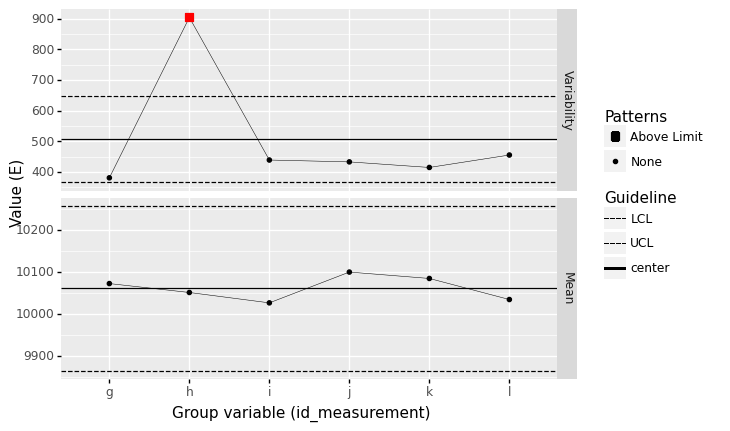

<ggplot: (8782805939222)>

In [18]:
## TODO: Assess the state of statistical control
# solution-begin
(
    df_data
    >> gr.tf_filter(DF.t == 0.250)
    >> gr.pt_xbs(group="id_measurement", var="E")
)
# solution-end

/Users/zach/Git/py_grama/grama/tran_pivot.py:471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and wi

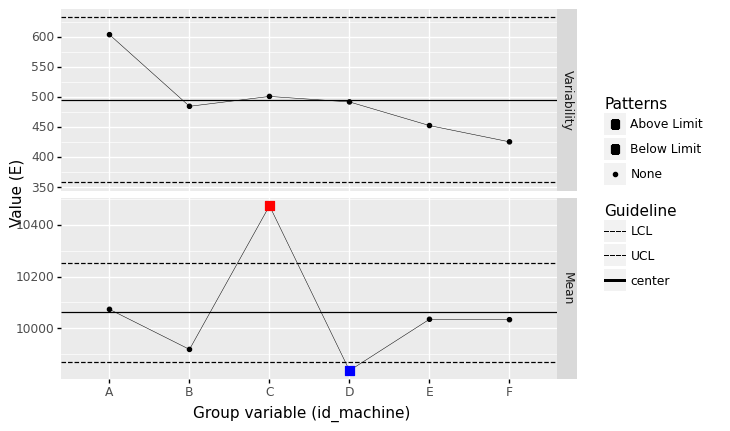

<ggplot: (8782840389069)>

In [19]:
# solution-begin
(
    df_data
    >> gr.tf_filter(DF.t == 0.250)
    >> gr.pt_xbs(group="id_machine", var="E")
)
# solution-end

*Observations*

<!-- task-begin -->
- Is `E` under statistical control? Why or why not?
  - (Your response here)
- Based on the group variable(s) you chose, what follow-up investigations should be done?
  - (Your response here)
<!-- task-end -->
<!-- solution-begin -->
- Is `E` under statistical control? Why or why not?
  - No; the mean elasticity violates the control limits for Machines C and D, and the variability of elasticity violates the UCL for measurement h.
- Based on the group variable(s) you chose, what follow-up investigations should be done?
  - We should investigate Machines C and D, and operator h.
<!-- solution-end -->


### __qX__ Assess statistical control of elasticity (Pt. 2)





/Users/zach/Git/py_grama/grama/tran_pivot.py:471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and wi

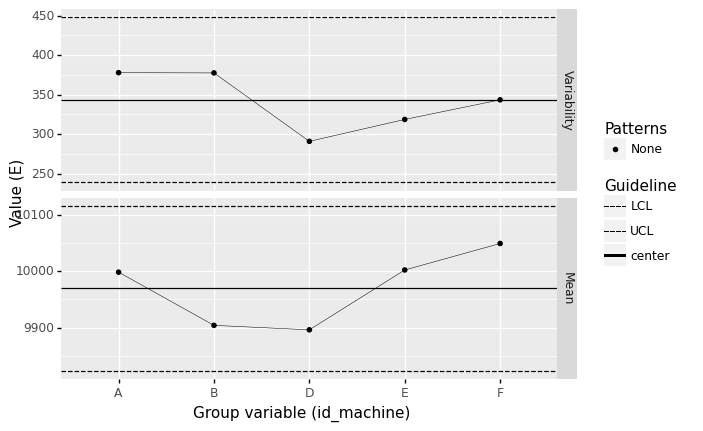

<ggplot: (8782861293942)>

In [23]:
(
    df_data
    >> gr.tf_filter(
        DF.t == 0.250,
        DF.id_machine != "C",
        DF.id_measurement != "h",
    )
# solution-begin
    >> gr.pt_xbs(group="id_machine", var="E")
# solution-end
)

/Users/zach/Git/py_grama/grama/tran_pivot.py:471: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and will be removed in a future version. You can use DataFrame.melt and DataFrame.loc as a substitute.
/Users/zach/Git/py_grama/grama/dfply/vector.py:122: FutureWarning: The 'lookup' method is deprecated and wi

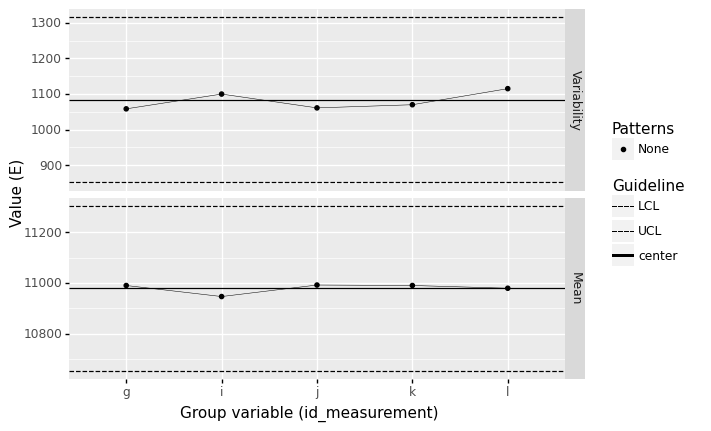

<ggplot: (8782755152415)>

In [22]:
(
    df_data
    >> gr.tf_filter(
        DF.id_machine != "C",
        DF.id_measurement != "h",
    )
    
    >> gr.pt_xbs(group="id_measurement", var="E")
)